In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#reading csv file
data = pd.read_csv("Salary_dataset.csv")

In [3]:
# This displays the top 5 rows of the data
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
# this describes the basic stat behind the dataset used 
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


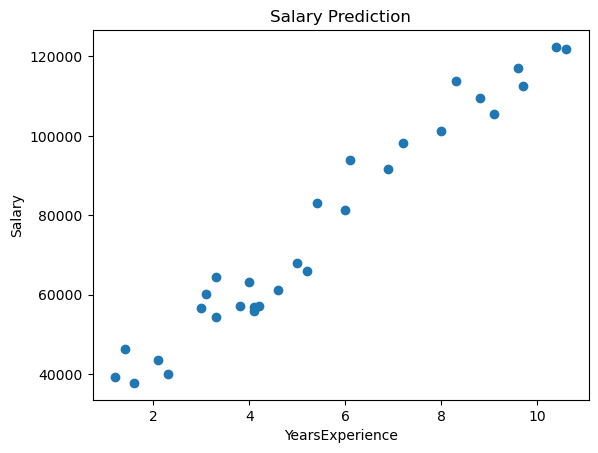

In [8]:
# These Plots help to explain the values and how they are scattered
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

C:\Users\s\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


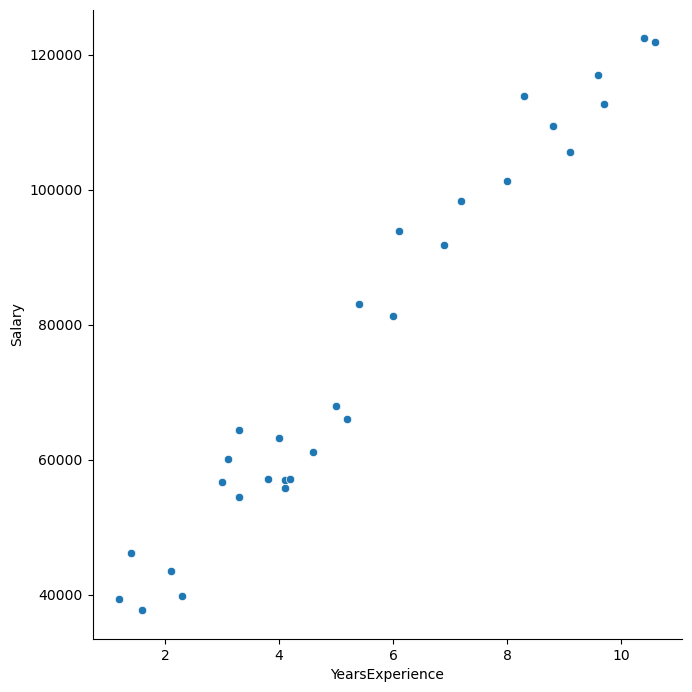

In [7]:
sns.pairplot(data,x_vars=['YearsExperience'], y_vars=['Salary'], size=7,kind='scatter')
plt.show()

In [9]:
# cooking thr data
X = data['YearsExperience']
X.head()

0    1.2
1    1.4
2    1.6
3    2.1
4    2.3
Name: YearsExperience, dtype: float64

In [11]:
Y = data['Salary']
Y.head()

0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
# Split the data for train and test 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=100)

In [15]:
# Create new axis for x column
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

C:\Users\s\AppData\Local\Temp\ipykernel_7380\67130142.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:,np.newaxis]
C:\Users\s\AppData\Local\Temp\ipykernel_7380\67130142.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:,np.newaxis]


In [16]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [17]:
# Fitting the model
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [18]:
# Predicting the Salary for the Test values
Y_pred = lr.predict(X_test)

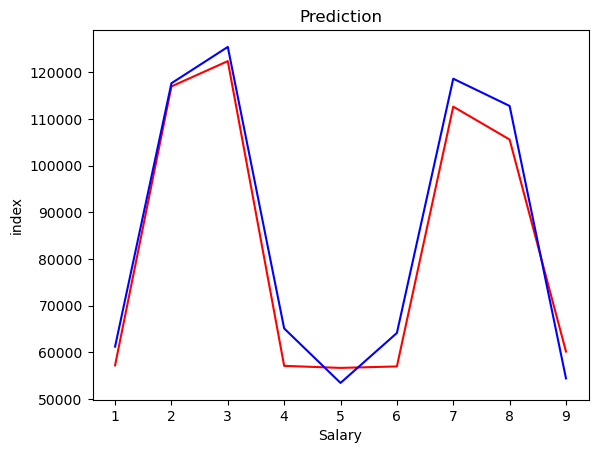

In [21]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(Y_test)+1,1)]
plt.plot(c,Y_test,color='r',linestyle='-')
plt.plot(c,Y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

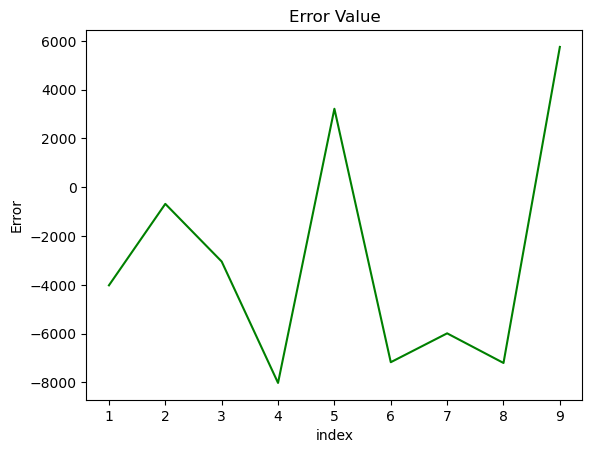

In [22]:
# plotting the error
c = [i for i in range(1,len(Y_test)+1,1)]
plt.plot(c,Y_test-Y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [23]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
# calculate Mean square error
mse = mean_squared_error(Y_test,Y_pred)

In [26]:
# Calculate R square vale
rsq = r2_score(Y_test,Y_pred)

In [27]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 30310299.043402478
r square : 0.9627668685473266


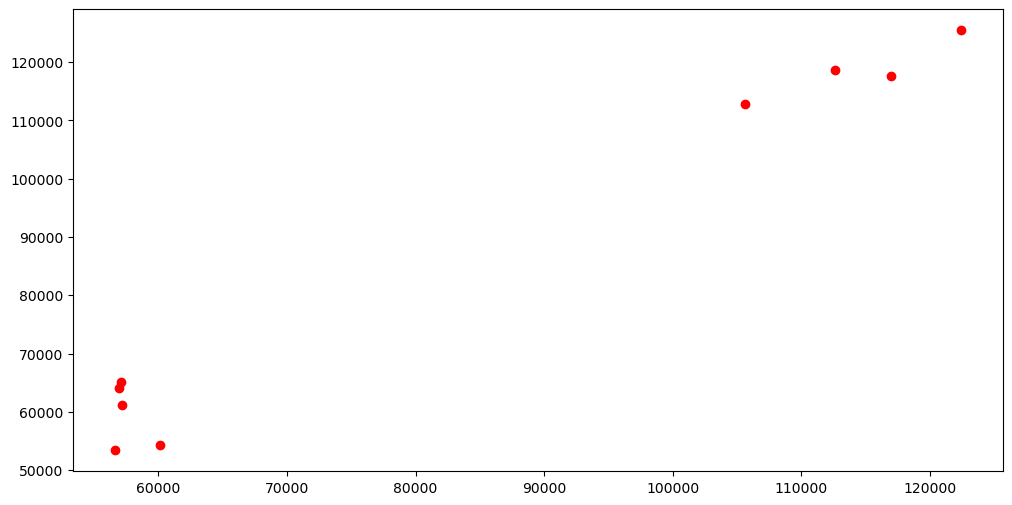

In [29]:
# Just plot actual and predicted values for more insights
plt.figure(figsize=(12,6))
plt.scatter(Y_test,Y_pred,color='r',linestyle='-')
plt.show()

In [30]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 24230.76740233037
Coefficient of the line: [9731.20383825]


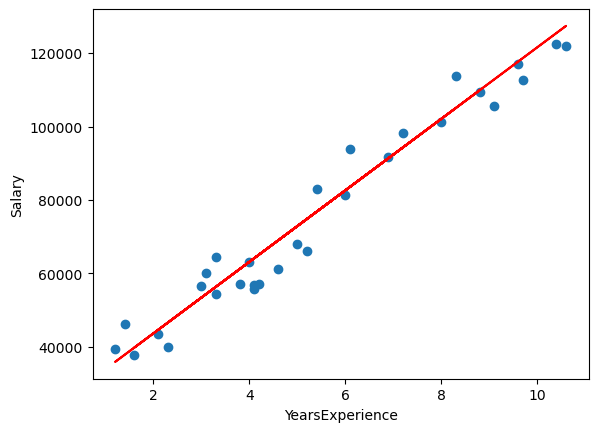

In [35]:
# visualize the linear regression line
plt.scatter(data['YearsExperience'], data['Salary'])
plt.plot(X_train, lr.predict(X_train), color = 'r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [38]:
#       y = 25202.8 + 9731.2x
#     y = mx + b